Devoir 2
===
## Interpolation d'Hermite

Elapsed time is 0.000265 seconds 
Elapsed time is 0.000600 seconds 


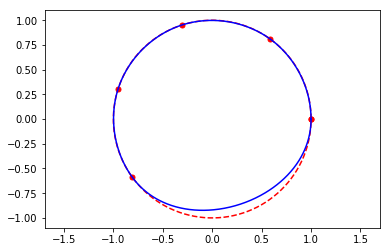

In [11]:
from numpy import *
import matplotlib.pyplot as plt
from timeit import default_timer as timer


def tic():
    global startTime
    startTime = timer()

# =========================================================================
 
def toc(message = ''):
    global startTime
    stopTime = timer()
    if message:
        message = ' (' + message + ')' ;
    print("Elapsed time is %.6f seconds %s" % ((stopTime - startTime),message) )
    startTime = 0

    
def hermite(x, X, U, dU):
    tic()
    i = zeros(len(x),dtype=int)
    for j in range(1,len(X)-1):    
        i[X[j]<=x] = j #Permet de donner le bon interval de X pour une valeur de x,
    
    
    A = (3*(U[i+1]-U[i])/(X[i+1]-X[i])**2) - ((dU[i+1] + 2*dU[i])/(X[i+1]-X[i])) 
    B = (-2*(U[i+1]-U[i])/(X[i+1]-X[i])**3) + ((dU[i+1] + dU[i])/((X[i+1]-X[i])**2)) 
    uh = U[i] + (x-X[i])*(dU[i] + (x-X[i])*(A + B*(x-X[i])))
    toc()
    return uh

###Test
n = 4;
T = arange(0,3*pi/2,3*pi/(2*(n+1)))
T = append(T,[2*pi])
t = linspace(T[0],T[-1],1000)
X = cos(T); Y = sin(T);
dX = -sin(T); dY = cos(T);
plt.plot(X,Y,'.r',markersize=10)
plt.plot(cos(t),sin(t),'--r')
plt.plot(hermite(t,T,X,dX),hermite(t,T,Y,dY),'-b')
plt.axis("equal"); plt.axis("equal")
plt.show()